# Intro to Machine Learning Notebook - Coders Across Disciplines
### Kishan Ramachandran | Fall 2018
This notebook is written to help beginners and intermediate programmers get aquainted with Machine Learning (ML). This notebook will be split into three broad sections:
   - What is machine learning
   - Types of machine learning
   - Further steps/readings
   
If you have any questions or comments, please contact kishan.ram@utexas.edu

Sources: [Sklearn Documentation](http://scikit-learn.org/stable/index.html), [Towards Data Science](https://towardsdatascience.com), [Linear Regression on Boston Housing Dataset](https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef)
***
# What is machine learning?
Machine learning is a useful tool that can help us identify trends or patterns in data that is not easily visible to us. At its core, machine learning is a set of mathematical models that we use to classify data, and then use those models to predict the behavior of any future/new data. The important takeaway is that machine learning is nothing but the **application of math**, and **using the computer as a tool** to do more than we could manually. 

***
# Types of machine learning
Machine learning can be split up into four categories of ML models, with two types for each model. The four categories are:
1. Regressions - Things like linear regressions, predicting a continuous value associated with an object
2. Clustering - Grouping similar objects into sets
3. Classification - Identifying which category an item fits into
4. Dimensionality Reduction - Reducting how many variables we consider in a problem

The two types are:
1. Supervised - Building a model using a ground truth, or pior knowledge of what the results should be for some of the data 
2. Unsupervised - Building a model with no prior knowledge of the behaivor of the data

***

## I believe learning is best done with examples, so I will now do an overview of what each model looks like

In [7]:
# First, I will set up this notebook with all necessary import statements and data vis settings of my preference

# Data management packages
import numpy as np
import pandas as pd
import scipy.stats as stats

# Data vis packages
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(context='notebook',style='dark')

# Machine learning packages
import sklearn
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

# Import sample datasets to use
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from sklearn.datasets.samples_generator import make_blobs

import warnings
warnings.filterwarnings('ignore')

## Let us start by exploring some ML regression techniques using the Boston House Prices dataset from Sklearn. This is a supervised regression problem

In [2]:
# I will load in the boston housing prices dataset and explore it to get an idea of what the data contains
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
# Convert data into a pandas dataframe
df_boston = pd.DataFrame(boston.data) 
df_boston.columns = boston.feature_names
df_boston['PRICE'] = boston.target # Add pricing info to data set
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


When looking at this data set, we can say that we have 13 *features* and one *target*. This means that there are 13 possible variables that affect our target, which is housing prices. So let's say we want to predict the price of a house in Boston when given the other 13 features. We can train a linear regression Ml model which will predict the housing price using our current data as training data.

The mean squared error is:  23.37456302971813


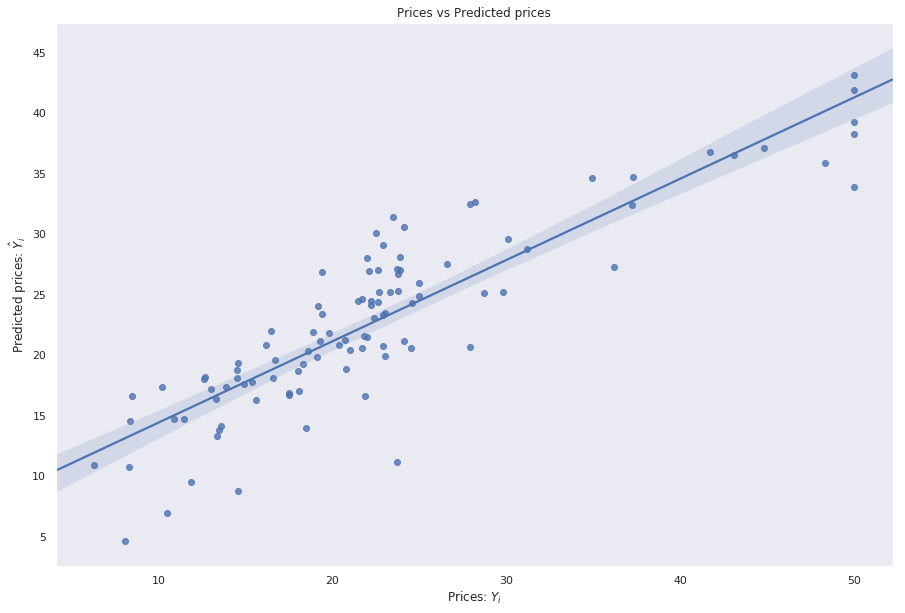

In [15]:
# Our target (Y) will be price, and everything else will be the feature set for the model
X = df_boston.drop('PRICE', axis = 1)
Y = df_boston['PRICE']

# I will split the data into a training set and a testing set so we can test the performance of our ML model
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.2, random_state = 1)
# In this, our _train data will be what the model is trained on, it will predict Y values based on X_test, and I will compare performance vs Y_test

# Train ML Linear Regression model on data
lm = LinearRegression()
lm.fit(X_train, Y_train)

# Predict housing prices using the testing X data
Y_pred = lm.predict(X_test)

# Plot data
plt.figure(1,figsize=(15,10))
sns.regplot(x=Y_test, y=Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices");


mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print("The mean squared error is: ",mse)